In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics import tsaplots
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import ParameterGrid
import random

In [2]:
ne_train = pd.read_csv("ne_train.csv")
south_train = pd.read_csv('south_train.csv')

ne_test = pd.read_csv("ne_test.csv")
south_test = pd.read_csv('s_test.csv')

In [4]:
columns = ['date', 'covid_19_confirmed_cases']
columns2 = ['date', 'confirmed']
ne_train = ne_train[columns]
ne_test = ne_test[columns2]

columns = ['date', 'covid_19_confirmed_cases']
columns2 = ['date', 'confirmed']
south_train = south_train[columns]
south_test = south_test[columns]

In [5]:
rename_mapping = {
    'date': 'ds',
    'covid_19_confirmed_cases': 'y',
}

ne_train.rename(columns=rename_mapping, inplace=True)

south_train.rename(columns=rename_mapping, inplace=True)

In [23]:
rename_mapping = {
    'date': 'ds',
    'confirmed': 'y',
}
ne_test.rename(columns=rename_mapping, inplace=True)

south_test.rename(columns=rename_mapping, inplace=True)

/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/4162089809.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_test.rename(columns=rename_mapping, inplace=True)


## Model - NE


### Prophet model tuning

In [7]:
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.15,0.2,0.25],
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)

In [29]:
end_date = '2020-7-30'
part1 = (ne_train['ds'] <= end_date)
part2 = (ne_train['ds'] > end_date)

X_train = ne_train.loc[part1]

In [36]:
start='2020-01-22'
end='2020-07-30'

In [41]:
model_df = pd.DataFrame(columns = ['MAE','Parameters'])

for param in grid:
    test = pd.DataFrame()
    print(param)
    
    ne_model = Prophet(changepoint_prior_scale = param['changepoint_prior_scale'],n_changepoints = param['n_changepoints'],
                         seasonality_mode = param['seasonality_mode'],weekly_seasonality = True,daily_seasonality = True,
                         yearly_seasonality = True,interval_width = 0.95)
    ne_model.fit(X_train)
    
    ne_forecast = ne_model.make_future_dataframe(periods = 190, freq = 'D',include_history = False)
    ne_forecast = ne_model.predict(ne_forecast)
    
    test = ne_forecast[['ds','yhat']]
    Actual = ne_train[(ne_train['ds'] > start) & (ne_train['ds'] <= end)]
    
    MAE = mean_absolute_error(Actual['y'],abs(test['yhat']))
    
    print('Mean Absolute Error(MAE)------------------------------------',MAE)
    
    model_parameters = model_df.append({'MAE':MAE,'Parameters':p},ignore_index = True)

20:47:30 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


20:47:31 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 4023.9511626033304


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:32 - cmdstanpy - INFO - Chain [1] start processing
20:47:32 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4898.094436749159


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:32 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


20:47:33 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:33 - cmdstanpy - INFO - Chain [1] start processing
20:47:33 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 4019.048777148588
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:33 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 5067.851565070377
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


20:47:34 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:34 - cmdstanpy - INFO - Chain [1] start processing
20:47:34 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3979.3790938974917
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:35 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 4871.173563439349
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.15, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


20:47:35 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:35 - cmdstanpy - INFO - Chain [1] start processing
20:47:35 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 4023.9511626033304
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.15, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4898.094436749159


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:35 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.15, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


20:47:36 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:36 - cmdstanpy - INFO - Chain [1] start processing
20:47:36 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 4019.048777148588
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.15, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:36 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 5067.851565070377
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.15, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


20:47:37 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:37 - cmdstanpy - INFO - Chain [1] start processing
20:47:37 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3979.3790938974917
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.15, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:38 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 4871.173563439349
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


20:47:38 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:38 - cmdstanpy - INFO - Chain [1] start processing
20:47:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 4023.9511626033304
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:38 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 4898.094436749159
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


20:47:39 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:39 - cmdstanpy - INFO - Chain [1] start processing
20:47:39 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 4019.048777148588
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 5067.851565070377


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:39 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


20:47:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:40 - cmdstanpy - INFO - Chain [1] start processing
20:47:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3979.3790938974917
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:41 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 4871.173563439349
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.24, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


20:47:41 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:41 - cmdstanpy - INFO - Chain [1] start processing
20:47:41 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 4023.9511626033304
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.24, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4898.094436749159


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:41 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.24, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


20:47:42 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:42 - cmdstanpy - INFO - Chain [1] start processing
20:47:42 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 4019.048777148588
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.24, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 5067.851565070377


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:42 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.24, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


20:47:43 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:43 - cmdstanpy - INFO - Chain [1] start processing
20:47:43 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3979.3790938974917
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.24, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:44 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 4871.173563439349
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


20:47:44 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:44 - cmdstanpy - INFO - Chain [1] start processing
20:47:44 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 4004.8255288619666
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4942.852224640085


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:45 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


20:47:45 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:46 - cmdstanpy - INFO - Chain [1] start processing
20:47:46 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 4020.379389378024
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4950.5328505288135
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:46 - cmdstanpy - INFO - Chain [1] start processing
20:47:46 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:47 - cmdstanpy - INFO - Chain [1] start processing
20:47:47 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3997.982392301496
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:47 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 4921.447414753172
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.15, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


20:47:47 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:48 - cmdstanpy - INFO - Chain [1] start processing
20:47:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 4004.8255288619666
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.15, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4942.852224640085


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:48 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.15, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


20:47:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:49 - cmdstanpy - INFO - Chain [1] start processing
20:47:49 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 4020.379389378024
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.15, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4950.5328505288135


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:49 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.15, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


20:47:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:50 - cmdstanpy - INFO - Chain [1] start processing
20:47:50 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3997.982392301496
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.15, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:50 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 4921.447414753172
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


20:47:51 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:51 - cmdstanpy - INFO - Chain [1] start processing
20:47:51 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 4004.8255288619666
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4942.852224640085


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:51 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


20:47:52 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:52 - cmdstanpy - INFO - Chain [1] start processing
20:47:52 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 4020.379389378024
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4950.5328505288135


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:52 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


20:47:53 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:53 - cmdstanpy - INFO - Chain [1] start processing
20:47:53 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3997.982392301496
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:53 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 4921.447414753172
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.24, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


20:47:54 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:54 - cmdstanpy - INFO - Chain [1] start processing
20:47:54 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 4004.8255288619666
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.24, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4942.852224640085


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:54 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.24, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


20:47:55 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:55 - cmdstanpy - INFO - Chain [1] start processing
20:47:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 4020.379389378024
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.24, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4950.5328505288135


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:55 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.24, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


20:47:56 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:56 - cmdstanpy - INFO - Chain [1] start processing
20:47:56 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3997.982392301496
{'changepoint_prior_scale': 0.15, 'holidays_prior_scale': 0.24, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:56 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 4921.447414753172
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


20:47:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:57 - cmdstanpy - INFO - Chain [1] start processing
20:47:57 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3997.2328374461995
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4884.096639578617
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:57 - cmdstanpy - INFO - Chain [1] start processing
20:47:58 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:58 - cmdstanpy - INFO - Chain [1] start processing
20:47:58 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 4042.1006733750996
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4832.117410532558


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:58 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


20:47:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:59 - cmdstanpy - INFO - Chain [1] start processing
20:47:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3967.8621836613875
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4910.916151679612


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:47:59 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.15, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


20:48:00 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:00 - cmdstanpy - INFO - Chain [1] start processing
20:48:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3997.2328374461995
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.15, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4884.096639578617


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:00 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.15, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


20:48:01 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:01 - cmdstanpy - INFO - Chain [1] start processing
20:48:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 4042.1006733750996
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.15, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:02 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 4832.117410532558
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.15, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


20:48:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:02 - cmdstanpy - INFO - Chain [1] start processing
20:48:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3967.8621836613875
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.15, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4910.916151679612


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:03 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


20:48:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:03 - cmdstanpy - INFO - Chain [1] start processing
20:48:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3997.2328374461995
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4884.096639578617
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:04 - cmdstanpy - INFO - Chain [1] start processing
20:48:04 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:04 - cmdstanpy - INFO - Chain [1] start processing
20:48:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 4042.1006733750996
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4832.117410532558


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:05 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


20:48:05 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:06 - cmdstanpy - INFO - Chain [1] start processing
20:48:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3967.8621836613875
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4910.916151679612


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:06 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.24, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


20:48:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:07 - cmdstanpy - INFO - Chain [1] start processing
20:48:07 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3997.2328374461995
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.24, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4884.096639578617


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:07 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.24, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


20:48:07 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:08 - cmdstanpy - INFO - Chain [1] start processing
20:48:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 4042.1006733750996
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.24, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4832.117410532558


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:08 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.24, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


20:48:08 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:09 - cmdstanpy - INFO - Chain [1] start processing
20:48:09 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3967.8621836613875
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.24, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4910.916151679612


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:09 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


20:48:09 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:10 - cmdstanpy - INFO - Chain [1] start processing
20:48:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3959.3444939141664
{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 5225.709624387376


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:10 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


20:48:10 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:11 - cmdstanpy - INFO - Chain [1] start processing
20:48:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3947.529261300235
{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 5154.116020153862


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:11 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


20:48:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:12 - cmdstanpy - INFO - Chain [1] start processing
20:48:12 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3964.9686823981765
{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4803.721059958455


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:12 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.15, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


20:48:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:13 - cmdstanpy - INFO - Chain [1] start processing
20:48:13 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3959.3444939141664
{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.15, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:13 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 5225.709624387376
{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.15, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


20:48:14 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:14 - cmdstanpy - INFO - Chain [1] start processing
20:48:14 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3947.529261300235
{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.15, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 5154.116020153862


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:14 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.15, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


20:48:15 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:15 - cmdstanpy - INFO - Chain [1] start processing
20:48:15 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3964.9686823981765
{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.15, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4803.721059958455


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:15 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


20:48:16 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:16 - cmdstanpy - INFO - Chain [1] start processing
20:48:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3959.3444939141664
{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:16 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 5225.709624387376
{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


20:48:17 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:17 - cmdstanpy - INFO - Chain [1] start processing
20:48:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3947.529261300235
{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:17 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 5154.116020153862
{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


20:48:18 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:18 - cmdstanpy - INFO - Chain [1] start processing
20:48:18 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3964.9686823981765
{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4803.721059958455


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:18 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.24, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


20:48:19 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:19 - cmdstanpy - INFO - Chain [1] start processing
20:48:19 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3959.3444939141664
{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.24, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:19 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 5225.709624387376
{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.24, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


20:48:20 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:20 - cmdstanpy - INFO - Chain [1] start processing
20:48:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3947.529261300235
{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.24, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:20 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 5154.116020153862
{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.24, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


20:48:21 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
20:48:21 - cmdstanpy - INFO - Chain [1] start processing
20:48:21 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 3964.9686823981765
{'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.24, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 4803.721059958455


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_16775/3669130598.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)


In [44]:
param_df = model_parameters.sort_values(by = ['MAE'])
param_df = param.reset_index(drop = True)
param_df.head()

,MAE,Parameters
0,3947.529261,"{'changepoint_prior_scale': 0.25, 'holidays_pr..."
1,3947.529261,"{'changepoint_prior_scale': 0.25, 'holidays_pr..."
2,3947.529261,"{'changepoint_prior_scale': 0.25, 'holidays_pr..."
3,3947.529261,"{'changepoint_prior_scale': 0.25, 'holidays_pr..."
4,3959.344494,"{'changepoint_prior_scale': 0.25, 'holidays_pr..."


In [47]:
print("Best Parameters for Model:", param['Parameters'][0])

Best Parameters for Model: {'changepoint_prior_scale': 0.25, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


In [49]:
ne_model = Prophet(changepoint_prior_scale= 0.25,
                   holidays_prior_scale = 0.1,n_changepoints = 150,
                   seasonality_mode = 'multiplicative', weekly_seasonality =T rue,
                   daily_seasonality = True,yearly_seasonality = True,interval_width = 0.95)
ne_model.fit(X_train)

20:52:18 - cmdstanpy - INFO - Chain [1] start processing
20:52:19 - cmdstanpy - INFO - Chain [1] done processing


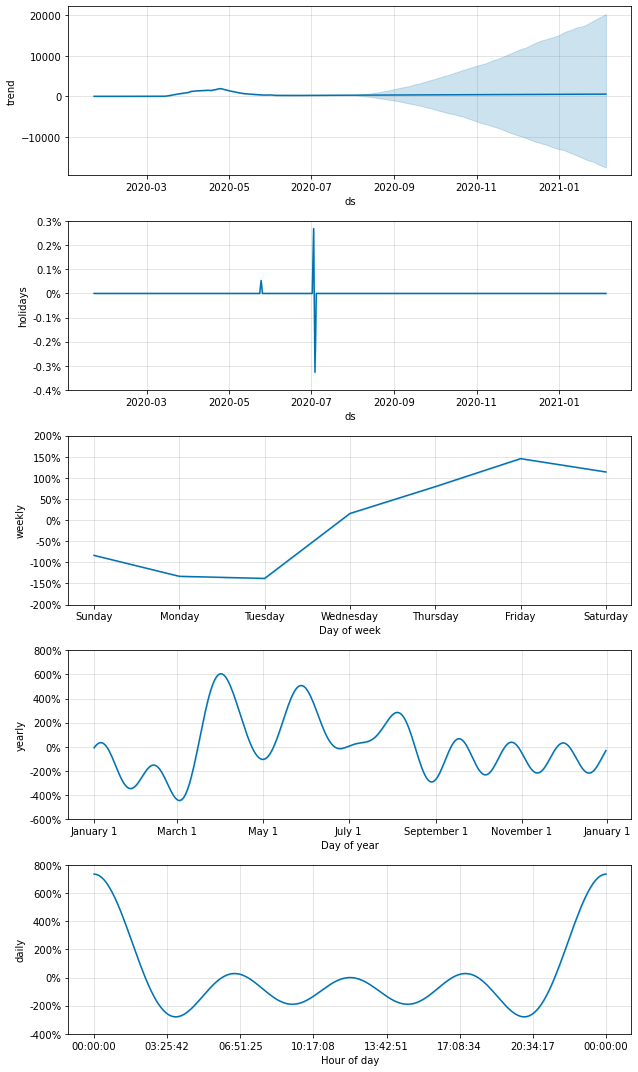

In [50]:
ne_future = ne_model.make_future_dataframe(periods = 190, freq = 'D')
ne_forecast = ne_model.predict(ne_future)

ne_plots = ne_model.plot_components(ne_forecast)

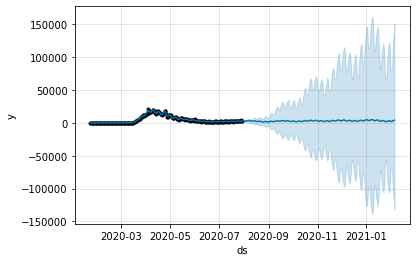

In [51]:
f, ax = plt.subplots(1)
fig = ne_model.plot(ne_forecast,ax=ax)
plt.show()

In [64]:
ne_test_pred = ne_model.predict(ne_test)

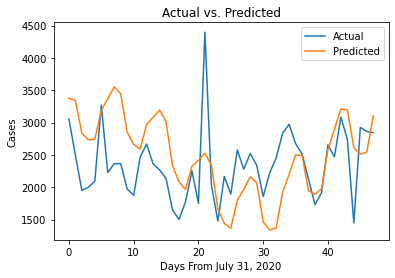

In [81]:
plt.plot(ne_test['y'], label = 'Actual')
plt.plot(ne_test_pred['yhat'], label = 'Predicted')
plt.xlabel('Days From July 31, 2020')
plt.ylabel('Cases')
plt.title('Actual vs. Predicted')
plt.legend()

In [66]:
mean_absolute_error(ne_test['y'],abs(ne_test_pred['yhat']))

561.9979821584915

### Model - South

In [8]:
end_date = '2020-7-30'
part1 = (south_train['ds'] <= end_date)
part2 = (south_train['ds'] > end_date)

X_train = south_train.loc[part1]

In [9]:
start='2020-01-22'
end='2020-07-30'

In [10]:
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1,0.01,0.001,0.2],
               'holidays_prior_scale' : [0.24, 0.2, 0.1],
              'n_changepoints' : [100,150,200]}
grid = ParameterGrid(params_grid)

In [11]:
model_df = pd.DataFrame(columns = ['MAE','Parameters'])

for param in grid:
    test = pd.DataFrame()
    print(param)
    
    south_model = Prophet(changepoint_prior_scale = p['changepoint_prior_scale'],
                          n_changepoints = p['n_changepoints'],seasonality_mode = p['seasonality_mode'],weekly_seasonality = True,
                          daily_seasonality = True,yearly_seasonality = True,interval_width = 0.95)
    
    south_model.fit(X_train)
    
    south_forecast = south_model.make_future_dataframe(periods = 190, freq = 'D',include_history = False)
    south_forecast = south_model.predict(south_forecast)
    
    test = south_forecast[['ds','yhat']]
    Actual = south_train[(south_train['ds'] > start) & (south_train['ds'] <= end)]
    
    MAE = mean_absolute_error(Actual['y'],abs(test['yhat']))
    
    print('Mean Absolute Error(MAE)------------------------------------',MAE)
    
    model_parameters = model_df.append({'MAE':MAE,'Parameters':p},ignore_index=True)

{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.24, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


21:49:03 - cmdstanpy - INFO - Chain [1] start processing
21:49:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:03 - cmdstanpy - INFO - Chain [1] start processing
21:49:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 18823.97515268745
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.24, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:03 - cmdstanpy - INFO - Chain [1] start processing
21:49:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 32046.768660328657
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.24, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:03 - cmdstanpy - INFO - Chain [1] start processing
21:49:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 18677.973122341544
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.24, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:04 - cmdstanpy - INFO - Chain [1] start processing
21:49:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 32032.43497816482
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.24, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:04 - cmdstanpy - INFO - Chain [1] start processing
21:49:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 18696.01855755469
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.24, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:04 - cmdstanpy - INFO - Chain [1] start processing
21:49:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 32058.81171054095
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Error(MAE)------------------------------------ 18823.97515268745


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:04 - cmdstanpy - INFO - Chain [1] start processing
21:49:04 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 32046.768660328657
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


21:49:05 - cmdstanpy - INFO - Chain [1] start processing
21:49:05 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:05 - cmdstanpy - INFO - Chain [1] start processing
21:49:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 18677.973122341544
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 32032.43497816482


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:05 - cmdstanpy - INFO - Chain [1] start processing
21:49:05 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Mean Absolute Error(MAE)------------------------------------ 18696.01855755469


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:05 - cmdstanpy - INFO - Chain [1] start processing
21:49:05 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 32058.81171054095


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:05 - cmdstanpy - INFO - Chain [1] start processing
21:49:05 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}
Mean Absolute Error(MAE)------------------------------------ 18823.97515268745
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


21:49:06 - cmdstanpy - INFO - Chain [1] start processing
21:49:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:06 - cmdstanpy - INFO - Chain [1] start processing
21:49:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 32046.768660328657
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:06 - cmdstanpy - INFO - Chain [1] start processing
21:49:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 18677.973122341544
{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 32032.43497816482


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:06 - cmdstanpy - INFO - Chain [1] start processing
21:49:06 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Mean Absolute Error(MAE)------------------------------------ 18696.01855755469


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:06 - cmdstanpy - INFO - Chain [1] start processing
21:49:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)


{'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 32058.81171054095
{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.24, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


21:49:07 - cmdstanpy - INFO - Chain [1] start processing
21:49:07 - cmdstanpy - INFO - Chain [1] done processing
21:49:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:49:07 - cmdstanpy - INFO - Chain [1] start processing
21:49:12 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:12 - cmdstanpy - INFO - Chain [1] start processing
21:49:12 - cmdstanpy - INFO - Chain [1] done processing
21:49:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:49:13 - cmdstanpy - INFO - Chain [1] st

Mean Absolute Error(MAE)------------------------------------ 102796.95796746908
{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.24, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


21:49:21 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:21 - cmdstanpy - INFO - Chain [1] start processing
21:49:21 - cmdstanpy - INFO - Chain [1] done processing
21:49:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:49:21 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 326137.338478006
{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.24, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


21:49:28 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:28 - cmdstanpy - INFO - Chain [1] start processing
21:49:28 - cmdstanpy - INFO - Chain [1] done processing
21:49:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:49:28 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 200315.3029671421
{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.24, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


21:49:30 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:30 - cmdstanpy - INFO - Chain [1] start processing
21:49:30 - cmdstanpy - INFO - Chain [1] done processing
21:49:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:49:30 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 346868.52787720226
{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.24, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


21:49:39 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:39 - cmdstanpy - INFO - Chain [1] start processing
21:49:39 - cmdstanpy - INFO - Chain [1] done processing
21:49:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:49:39 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 198021.14255718942
{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.24, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


21:49:42 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:42 - cmdstanpy - INFO - Chain [1] start processing
21:49:42 - cmdstanpy - INFO - Chain [1] done processing
21:49:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:49:42 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 347018.7835866408
{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


21:49:47 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:47 - cmdstanpy - INFO - Chain [1] start processing
21:49:47 - cmdstanpy - INFO - Chain [1] done processing
21:49:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:49:47 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 102796.95796746908
{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


21:49:57 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:49:57 - cmdstanpy - INFO - Chain [1] start processing
21:49:57 - cmdstanpy - INFO - Chain [1] done processing
21:49:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:49:57 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 326137.338478006
{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


21:50:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:50:04 - cmdstanpy - INFO - Chain [1] start processing
21:50:04 - cmdstanpy - INFO - Chain [1] done processing
21:50:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:50:04 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 200315.3029671421
{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


21:50:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:50:06 - cmdstanpy - INFO - Chain [1] start processing
21:50:06 - cmdstanpy - INFO - Chain [1] done processing
21:50:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:50:06 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 346868.52787720226
{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


21:50:15 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:50:16 - cmdstanpy - INFO - Chain [1] start processing
21:50:16 - cmdstanpy - INFO - Chain [1] done processing
21:50:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:50:16 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 198021.14255718942
{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


21:50:18 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:50:18 - cmdstanpy - INFO - Chain [1] start processing
21:50:18 - cmdstanpy - INFO - Chain [1] done processing
21:50:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:50:18 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 347018.7835866408
{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


21:50:23 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:50:23 - cmdstanpy - INFO - Chain [1] start processing
21:50:23 - cmdstanpy - INFO - Chain [1] done processing
21:50:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:50:24 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 102796.95796746908
{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


21:50:32 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:50:32 - cmdstanpy - INFO - Chain [1] start processing
21:50:32 - cmdstanpy - INFO - Chain [1] done processing
21:50:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:50:32 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 326137.338478006
{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


21:50:38 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:50:39 - cmdstanpy - INFO - Chain [1] start processing
21:50:39 - cmdstanpy - INFO - Chain [1] done processing
21:50:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:50:39 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 200315.3029671421
{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


21:50:41 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:50:41 - cmdstanpy - INFO - Chain [1] start processing
21:50:41 - cmdstanpy - INFO - Chain [1] done processing
21:50:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:50:41 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 346868.52787720226
{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


21:50:50 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:50:50 - cmdstanpy - INFO - Chain [1] start processing
21:50:50 - cmdstanpy - INFO - Chain [1] done processing
21:50:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:50:50 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 198021.14255718942
{'changepoint_prior_scale': 0.01, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


21:50:52 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:50:52 - cmdstanpy - INFO - Chain [1] start processing
21:50:52 - cmdstanpy - INFO - Chain [1] done processing
21:50:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:50:53 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 347018.7835866408
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.24, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


21:50:56 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:50:56 - cmdstanpy - INFO - Chain [1] start processing
21:50:56 - cmdstanpy - INFO - Chain [1] done processing
21:50:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:50:56 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 213530.7409920596
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.24, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


21:51:30 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:51:30 - cmdstanpy - INFO - Chain [1] start processing
21:51:30 - cmdstanpy - INFO - Chain [1] done processing
21:51:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:51:30 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 329916.3594565909
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.24, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


21:52:04 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:52:04 - cmdstanpy - INFO - Chain [1] start processing
21:52:04 - cmdstanpy - INFO - Chain [1] done processing
21:52:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:52:04 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 244145.33159977105
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.24, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


21:52:06 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:52:06 - cmdstanpy - INFO - Chain [1] start processing
21:52:06 - cmdstanpy - INFO - Chain [1] done processing
21:52:06 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:52:06 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 294946.98319987394
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.24, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


21:52:15 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:52:15 - cmdstanpy - INFO - Chain [1] start processing
21:52:15 - cmdstanpy - INFO - Chain [1] done processing
21:52:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:52:15 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 227837.88012691398
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.24, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


21:52:17 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:52:17 - cmdstanpy - INFO - Chain [1] start processing
21:52:17 - cmdstanpy - INFO - Chain [1] done processing
21:52:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:52:17 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 294821.9904722673
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


21:52:20 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:52:20 - cmdstanpy - INFO - Chain [1] start processing
21:52:20 - cmdstanpy - INFO - Chain [1] done processing
21:52:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:52:20 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 213530.7409920596
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


21:52:55 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:52:55 - cmdstanpy - INFO - Chain [1] start processing
21:52:55 - cmdstanpy - INFO - Chain [1] done processing
21:52:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:52:55 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 329916.3594565909
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


21:53:26 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:53:26 - cmdstanpy - INFO - Chain [1] start processing
21:53:26 - cmdstanpy - INFO - Chain [1] done processing
21:53:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:53:26 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 244145.33159977105
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


21:53:29 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:53:29 - cmdstanpy - INFO - Chain [1] start processing
21:53:29 - cmdstanpy - INFO - Chain [1] done processing
21:53:29 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:53:29 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 294946.98319987394
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


21:53:38 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:53:38 - cmdstanpy - INFO - Chain [1] start processing
21:53:38 - cmdstanpy - INFO - Chain [1] done processing
21:53:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:53:38 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 227837.88012691398
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


21:53:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:53:40 - cmdstanpy - INFO - Chain [1] start processing
21:53:40 - cmdstanpy - INFO - Chain [1] done processing
21:53:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:53:40 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 294821.9904722673
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


21:53:43 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:53:44 - cmdstanpy - INFO - Chain [1] start processing
21:53:44 - cmdstanpy - INFO - Chain [1] done processing
21:53:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:53:44 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 213530.7409920596
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


21:54:17 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:54:17 - cmdstanpy - INFO - Chain [1] start processing
21:54:17 - cmdstanpy - INFO - Chain [1] done processing
21:54:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:54:17 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 329916.3594565909
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


21:54:49 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:54:49 - cmdstanpy - INFO - Chain [1] start processing
21:54:49 - cmdstanpy - INFO - Chain [1] done processing
21:54:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:54:49 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 244145.33159977105
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


21:54:51 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:54:51 - cmdstanpy - INFO - Chain [1] start processing
21:54:51 - cmdstanpy - INFO - Chain [1] done processing
21:54:51 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:54:51 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 294946.98319987394
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


21:54:59 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:55:00 - cmdstanpy - INFO - Chain [1] start processing
21:55:00 - cmdstanpy - INFO - Chain [1] done processing
21:55:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
21:55:00 - cmdstanpy - INFO - Chain [1] start processing


Mean Absolute Error(MAE)------------------------------------ 227837.88012691398
{'changepoint_prior_scale': 0.001, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


21:55:02 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:55:02 - cmdstanpy - INFO - Chain [1] start processing
21:55:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 294821.9904722673
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.24, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:55:02 - cmdstanpy - INFO - Chain [1] start processing
21:55:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 23276.71454321386
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.24, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 31988.91767492965
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.24, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:55:02 - cmdstanpy - INFO - Chain [1] start processing
21:55:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:55:03 - cmdstanpy - INFO - Chain [1] start processing
21:55:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 22926.147523971293
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.24, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 32077.3625950302
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.24, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:55:03 - cmdstanpy - INFO - Chain [1] start processing
21:55:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:55:03 - cmdstanpy - INFO - Chain [1] start processing
21:55:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 21423.910143297435
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.24, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 32095.7162798818
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:55:03 - cmdstanpy - INFO - Chain [1] start processing
21:55:03 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:55:03 - cmdstanpy - INFO - Chain [1] start processing
21:55:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 23276.71454321386
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 31988.91767492965
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:55:04 - cmdstanpy - INFO - Chain [1] start processing
21:55:04 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:55:04 - cmdstanpy - INFO - Chain [1] start processing
21:55:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 22926.147523971293
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 32077.3625950302
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:55:04 - cmdstanpy - INFO - Chain [1] start processing
21:55:04 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:55:04 - cmdstanpy - INFO - Chain [1] start processing
21:55:04 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 21423.910143297435
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 32095.7162798818
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:55:05 - cmdstanpy - INFO - Chain [1] start processing
21:55:05 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:55:05 - cmdstanpy - INFO - Chain [1] start processing
21:55:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 23276.71454321386
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 31988.91767492965


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:55:05 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


21:55:05 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:55:05 - cmdstanpy - INFO - Chain [1] start processing
21:55:05 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 22926.147523971293
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 32077.3625950302


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:55:06 - cmdstanpy - INFO - Chain [1] start processing
21:55:06 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)
21:55:06 - cmdstanpy - INFO - Chain [1] start processing
21:55:06 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error(MAE)------------------------------------ 21423.910143297435
{'changepoint_prior_scale': 0.2, 'holidays_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}
Mean Absolute Error(MAE)------------------------------------ 32095.7162798818


/var/folders/g7/jzp2y_x97yd3w1yf2x3s7wjc0000gn/T/ipykernel_51333/1474502826.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_parameters = model_parameters.append({'MAE':MAE,'Parameters':p},ignore_index=True)


In [14]:
param_df = model_parameters.sort_values(by = ['MAE'])
param_df = param.reset_index(drop = True)
param.head()

,MAE,Parameters
0,18677.973122,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
1,18677.973122,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
2,18677.973122,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
3,18696.018558,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."
4,18696.018558,"{'changepoint_prior_scale': 0.1, 'holidays_pri..."


In [15]:
param['Parameters'][0]

{'changepoint_prior_scale': 0.1,
 'holidays_prior_scale': 0.24,
 'n_changepoints': 150,
 'seasonality_mode': 'multiplicative'}

In [16]:
south_model = Prophet(changepoint_prior_scale= 0.1,
                   holidays_prior_scale = 0.24,n_changepoints = 150,
                   seasonality_mode = 'multiplicative', weekly_seasonality = True,
                   daily_seasonality = True,yearly_seasonality = True,interval_width = 0.95)
south_model.fit(X_train)

22:00:33 - cmdstanpy - INFO - Chain [1] start processing
22:00:33 - cmdstanpy - INFO - Chain [1] done processing


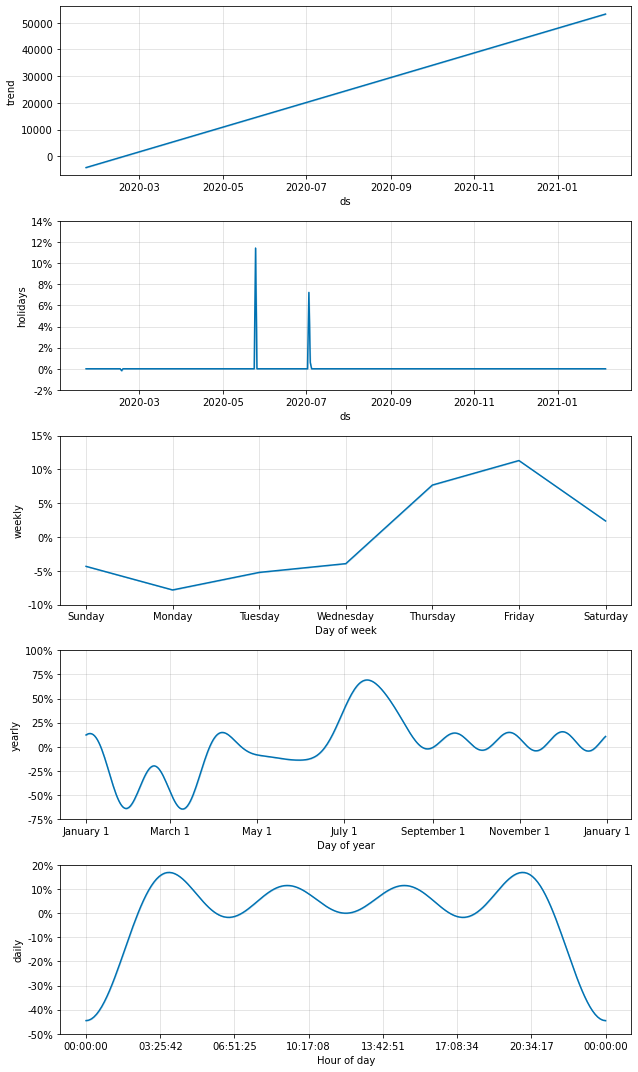

In [104]:
south_future = south_model.make_future_dataframe(periods = 190, freq = 'D')
south_forecast = south_model.predict(south_future)

south_plots = south_model.plot_components(south_forecast)

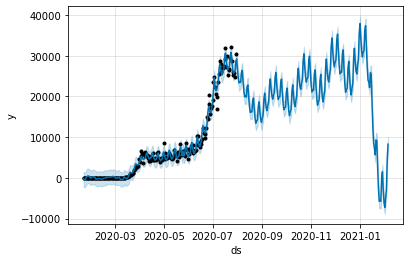

In [105]:
f, ax = plt.subplots(1)
fig = south_model.plot(south_forecast,ax=ax)
plt.show()

In [17]:
south_test_pred = south_model.predict(south_test)

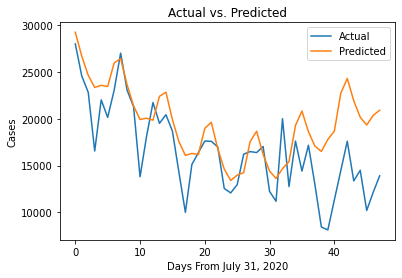

In [26]:
plt.plot(south_test['covid_19_confirmed_cases'], label = 'Actual')
plt.plot(south_test_pred['yhat'], label = 'Predicted')
plt.xlabel('Days From July 31, 2020')
plt.ylabel('Cases')
plt.title('Actual vs. Predicted')
plt.legend()

In [25]:
mean_absolute_error(south_test['covid_19_confirmed_cases'],abs(south_test_pred['yhat']))

3481.1043819114907